Import packages:

In [1]:
import tensorflow as tf

import sklearn as skl
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load in data and view


In [2]:
df = pd.read_csv('C:/Users/Mary Jane/Downloads/patient_churn.csv')

df=df.dropna()
df=df.drop('ID',axis=1)
df

,Sex,Birth Year,Death Year,Assignment Step Flag,Count of Primary Care Services,Beneficiary had a date of death prior to the start of the benchmark year,Beneficiary identifier is missing,Beneficiary had at least one month of Part A-only Or Part B-only Coverage,Beneficiary had at least one month in a Medicare Health Plan,Beneficiary does not reside in the United States,Beneficiary included in other Shared Savings Initiatives
1,2,1933,2015.0,2,3,0,0,0,0,0,0
10,1,1921,2016.0,2,4,0,0,0,0,0,0
11,2,1926,2015.0,1,4,0,0,0,0,0,0
19,1,1941,2018.0,1,1,0,0,0,0,0,0
27,1,1919,2015.0,1,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
124442,2,1926,2016.0,1,2,0,0,0,0,0,0
124443,2,1917,2014.0,1,2,1,0,0,0,0,0
124447,2,1928,2015.0,1,3,0,0,0,0,0,0
124452,1,1937,2014.0,1,2,1,0,0,0,0,0


In [3]:
df.describe()

,Sex,Birth Year,Death Year,Assignment Step Flag,Count of Primary Care Services,Beneficiary had a date of death prior to the start of the benchmark year,Beneficiary identifier is missing,Beneficiary had at least one month of Part A-only Or Part B-only Coverage,Beneficiary had at least one month in a Medicare Health Plan,Beneficiary does not reside in the United States,Beneficiary included in other Shared Savings Initiatives
count,22612.000000,22612.000000,22612.000000,22612.000000,22612.000000,22612.000000,22612.000000,22612.000000,22612.000000,22612.000000,22612.0
mean,1.544843,1933.630064,2015.538785,1.091014,3.618344,0.253273,0.000133,0.000973,0.059924,0.000265,0.0
std,0.497996,10.508260,1.262065,0.287635,3.881819,0.434895,0.011518,0.031177,0.237351,0.016288,0.0
min,1.000000,1908.000000,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1926.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2.000000,1932.000000,2016.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,1940.000000,2017.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,2.000000,1991.000000,2018.000000,2.000000,116.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


<AxesSubplot:>

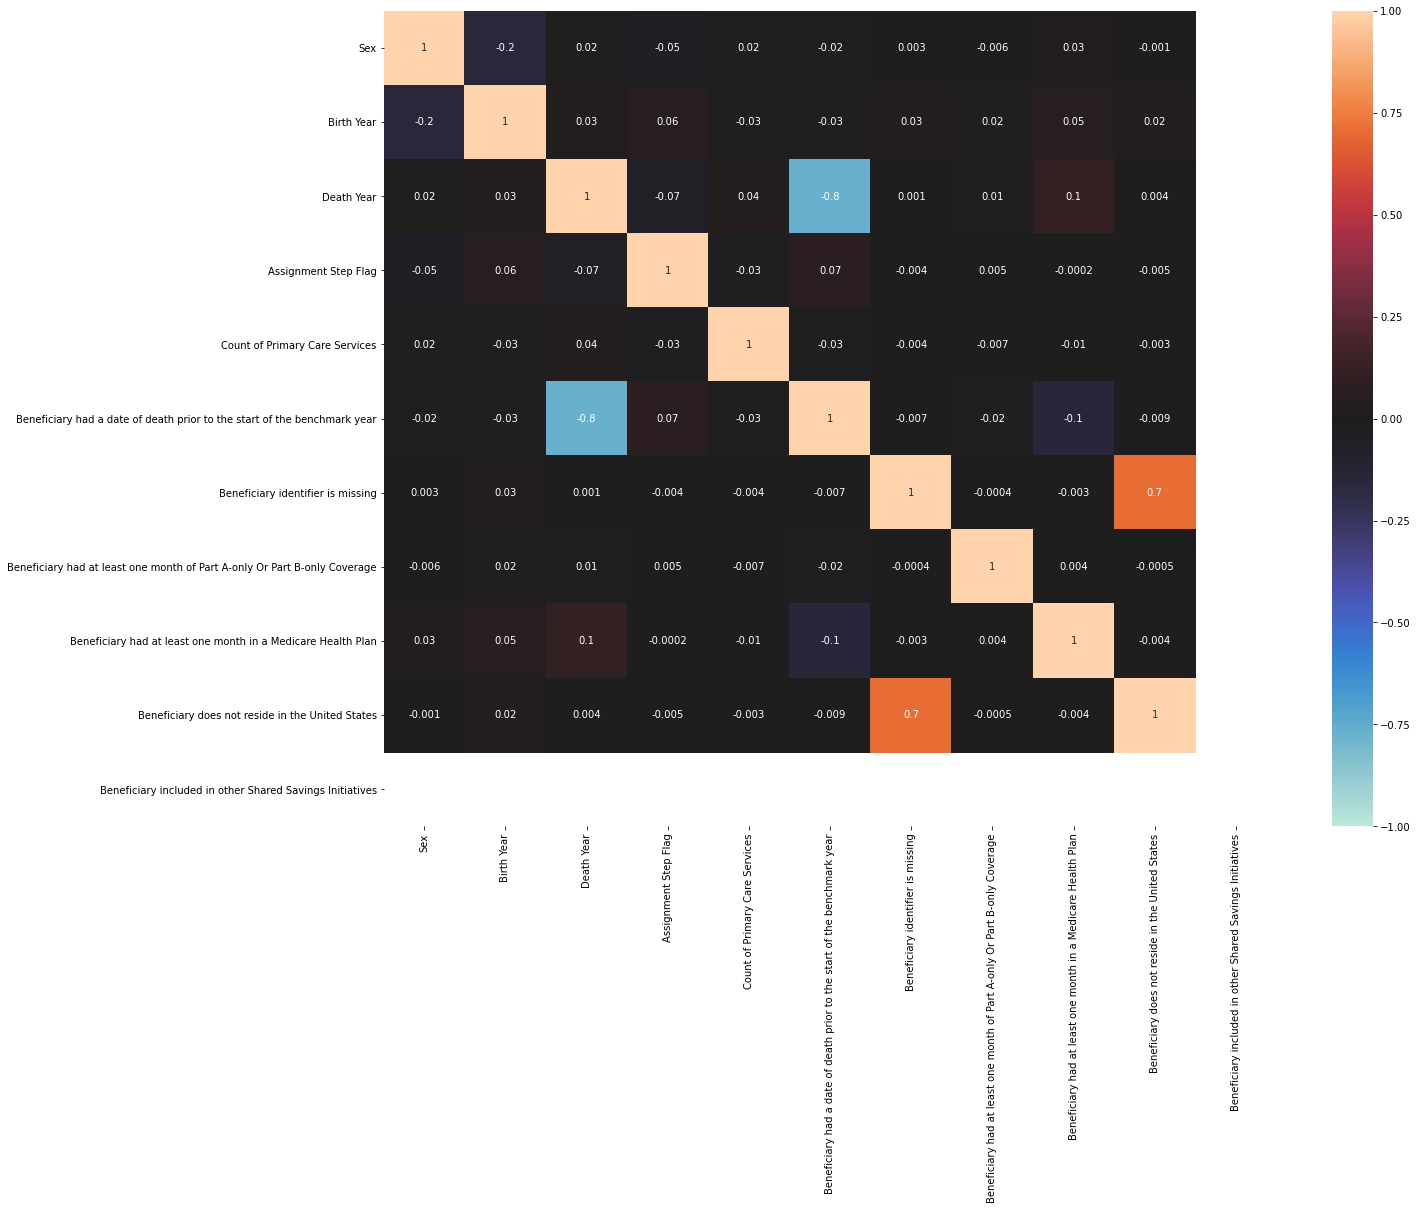

In [4]:
df.corr()

import seaborn as sns

fig, ax = plt.subplots(figsize=(20,15))   
sns.heatmap(df.corr(), annot = True, fmt ='.1g',vmin=-1, vmax=1, center= 0,ax=ax)

Partition into a training and test set. Here i'm doing 3/4 train 1/4 test.

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.25, random_state=42)

In [6]:
X_train=train_set.iloc[:,:5]
Y_train=train_set.iloc[:,5:]

X_test=test_set.iloc[:,:5]
Y_test=test_set.iloc[:,5:]

Now we normalize our input variables to a standard scale (mean 0, st dev 1)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_attribs = ["Sex",'Assignment Step Flag']
num_attribs = list(X_train.drop(cat_attribs,axis=1) )


num_pipeline = Pipeline( [
 ('std_scaler', StandardScaler()),   
])

#define the pipeline process for the data set
full_pipeline = ColumnTransformer( [
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)      
])

In [10]:
#create an array of prepared data based on the test data set
X_train = full_pipeline.fit_transform(X_train)
X_train.shape

(16959, 7)

In [11]:
X_test = full_pipeline.fit_transform(X_test)
X_test.shape

(5653, 7)

In [12]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

#determine the number of features/dimensions required to preserve 95% of the training set's variance
#create a PCA object
pca = PCA()

#fit the data to the PCA
pca.fit(X_train)


cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

4

In [13]:
pca.explained_variance_ratio_

array([2.85621737e-01, 2.81586669e-01, 2.59163273e-01, 1.29377008e-01,
       4.42513133e-02, 2.47969314e-33, 2.03912157e-33])

In [16]:

model = PCA(n_components=.95).fit(X_train)
X_pc = model.transform(X_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['Sex','Birth_Year','Death_Year','Step','Primary_Care']
# get the names
most_important_features = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_features[i] for i in range(n_pcs)}

# build the dataframe
df1 = pd.DataFrame(dic.items())

Most important Features based on variability in data

In [17]:
df1

,0,1
0,PC0,Sex
1,PC1,Birth_Year
2,PC2,Death_Year
3,PC3,Primary_Care


Now we build our neural network

In [72]:
from tensorflow import keras

#starting by setting random seeds and restarting keras blackend session
np.random.seed(42)
tf.random.set_seed(42)

#resets the Keras global state - helps avoid clutter from old models and layers, especially when memory is limited
keras.backend.clear_session()

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation='relu',input_shape=(7, )),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(6, activation="softmax"),
])

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 126       
Total params: 6,996
Trainable params: 6,996
Non-trainable params: 0
_________________________________________________________________


Then we train it

In [75]:
from focal_loss import BinaryFocalLoss

m = tf.keras.metrics.PrecisionAtRecall(0.5)
m.update_state([0, 0, 0, 1, 1], [0, 0.3, 0.8, 0.3, 0.8])
m.result().numpy()



k = tf.keras.metrics.SensitivityAtSpecificity(0.5)
k.update_state([0, 0, 0, 1, 1], [0, 0.3, 0.8, 0.3, 0.8])
k.result().numpy()


model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=keras.optimizers.Nadam(lr=0.00001), metrics=[tf.keras.metrics.AUC(),k,m])

C:\Users\Mary Jane\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [76]:
early_stopping = keras.callbacks.EarlyStopping(monitor='loss',mode='min',patience=1,verbose=1)

In [77]:
model.fit(X_train, Y_train,epochs=100, batch_size=1, verbose=1,callbacks=early_stopping)

Epoch 1/100
16959/16959 [==============================] - 14s 799us/step - loss: 0.3049 - auc: 0.8985 - sensitivity_at_specificity: 0.9607 - precision_at_recall: 0.5199
Epoch 2/100
16959/16959 [==============================] - 13s 783us/step - loss: 0.1153 - auc: 0.9675 - sensitivity_at_specificity: 0.9974 - precision_at_recall: 0.9970
Epoch 3/100
16959/16959 [==============================] - 13s 781us/step - loss: 0.0797 - auc: 0.9743 - sensitivity_at_specificity: 0.9985 - precision_at_recall: 0.9992
Epoch 4/100
16959/16959 [==============================] - 14s 804us/step - loss: 0.0625 - auc: 0.9789 - sensitivity_at_specificity: 0.9991 - precision_at_recall: 1.0000
Epoch 5/100
16959/16959 [==============================] - 13s 786us/step - loss: 0.0555 - auc: 0.9803 - sensitivity_at_specificity: 0.9991 - precision_at_recall: 1.0000
Epoch 6/100
16959/16959 [==============================] - 13s 786us/step - loss: 0.0562 - auc: 0.9793 - sensitivity_at_specificity: 0.9985 - precisio

Now we predict

In [78]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test,verbose=1)
print(y_pred)

print(score)



177/177 [==============================] - 0s 910us/step - loss: 0.0488 - auc: 0.9845 - sensitivity_at_specificity: 0.9984 - precision_at_recall: 1.0000
[[9.96e-02 1.56e-01 1.73e-01 5.54e-01 1.80e-02 3.12e-04]
 [1.11e-01 1.20e-01 1.05e-01 6.40e-01 2.37e-02 3.46e-04]
 [2.03e-02 1.77e-01 1.57e-01 6.22e-01 2.35e-02 1.49e-04]
 ...
 [1.18e-01 1.41e-01 8.57e-02 6.29e-01 2.67e-02 4.92e-04]
 [1.10e-01 1.64e-01 1.25e-01 5.78e-01 2.21e-02 4.39e-04]
 [2.98e-01 1.34e-01 9.91e-02 4.42e-01 2.46e-02 1.14e-03]]
[0.048782166093587875, 0.9845364093780518, 0.9983534812927246, 1.0]


In [79]:
y_pred = model.predict(X_test)
y_pred

array([[9.96e-02, 1.56e-01, 1.73e-01, 5.54e-01, 1.80e-02, 3.12e-04],
       [1.11e-01, 1.20e-01, 1.05e-01, 6.40e-01, 2.37e-02, 3.46e-04],
       [2.03e-02, 1.77e-01, 1.57e-01, 6.22e-01, 2.35e-02, 1.49e-04],
       ...,
       [1.18e-01, 1.41e-01, 8.57e-02, 6.29e-01, 2.67e-02, 4.92e-04],
       [1.10e-01, 1.64e-01, 1.25e-01, 5.78e-01, 2.21e-02, 4.39e-04],
       [2.98e-01, 1.34e-01, 9.91e-02, 4.42e-01, 2.46e-02, 1.14e-03]],
      dtype=float32)

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = .5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [81]:
from sklearn.metrics import confusion_matrix

Y_test2=Y_test.to_numpy()

Actuals=Y_test2.argmax(axis=1)
y_pred2=y_pred[:,:].argmax(axis=1)

matrix = confusion_matrix(Actuals, y_pred2)
np.set_printoptions(precision=2)

In [82]:
matrix

array([[2085,  128,   20, 3056,    0],
       [   1,    0,    0,    1,    0],
       [   1,    0,    0,    3,    0],
       [  63,    5,    1,  288,    0],
       [   0,    0,    0,    1,    0]], dtype=int64)

In [83]:
classes=df.iloc[:,5:].columns

Normalized confusion matrix
[[0.39 0.02 0.   0.58 0.  ]
 [0.5  0.   0.   0.5  0.  ]
 [0.25 0.   0.   0.75 0.  ]
 [0.18 0.01 0.   0.81 0.  ]
 [0.   0.   0.   1.   0.  ]]


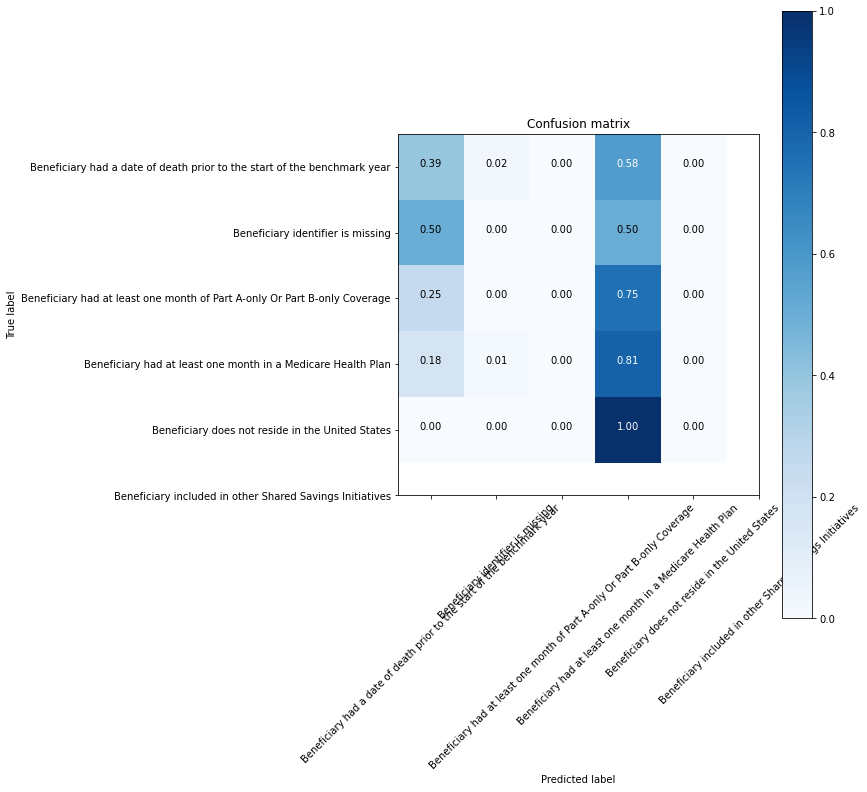

In [84]:
import itertools

plt.figure(figsize=(12,12))
foo = plot_confusion_matrix(matrix, classes=classes,normalize=True,
                      title='Confusion matrix')